C:\Users\set\anaconda3\lib\site-packages\scipy\stats\_discrete_distns.py:67: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


(50.0, 150.0)

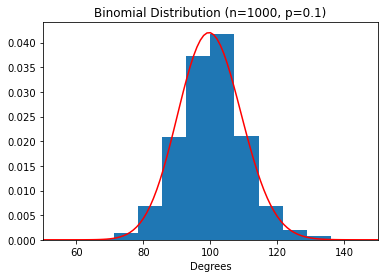

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import random as rn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

  

  
def random_graph(N,P):
    # Create an empty graph object
    g = nx.Graph()
  
  
    # Adding nodes
    g.add_nodes_from(range(1, N + 1))
  
  
    # Add edges to the graph randomly.
    for i in g.nodes():
        for j in g.nodes():
            if (i < j):
              
                # Take random number R.
                R = rn.random()
              
                # Check if R<P add the edge to the graph else ignore.
                if (R < P):
                    g.add_edge(i, j)
                    
    return g                
    

    
N=1000
P=0.1
  
g = random_graph(N,P)
    
#print(nx.degree(g))
all_node_degree = list(dict((nx.degree(g))).values())
  
unique_degree = list(set(all_node_degree))
unique_degree.sort()
nodes_with_degree = []
for i in unique_degree:
    nodes_with_degree.append(all_node_degree.count(i))
    


#plt.plot(unique_degree, nodes_with_degree)
plt.hist(all_node_degree, density = True)
plt.xlabel("Degrees")
plt.ylabel("")
plt.title("Degree distribution")
#plt.show()   

x = np.arange(0, N+1)
binomial_pmf = binom.pmf(x, N, P)

#print(binomial_pmf)
plt.plot(x, binomial_pmf, color='red')

plt.title(f"Binomial Distribution (n={N}, p={P})")
plt.xlim(50,150)
# Display connection between nodes    
#distribution_graph(g)

In [19]:
K_ws = 50
p_ws = 0.2
g1=nx.watts_strogatz_graph(2000, K_ws, p_ws, seed=None)


In [20]:
import math

In [22]:
degrees_freq_ws = nx.degree_histogram(g1)
degrees_ws = range(len(degrees_freq_ws))
K2 = int(K_ws/2)
p_k = np.zeros((len(degrees_ws), K_ws))
pp = np.zeros(len(degrees_ws))

for i,k in enumerate(degrees_ws):
    for n in range(min(k-K2,K2)+1):
        p_k[i,n] = math.comb(K2,n)*((1-p_ws)**n)*(p_ws**(K2-n))*((p_ws*K2)**(k-n-K2))*np.exp(-p_ws*K2)/(math.factorial(k-n-K2))
    pp[i]  =sum(p_k[i,:])

(30.0, 60.0)

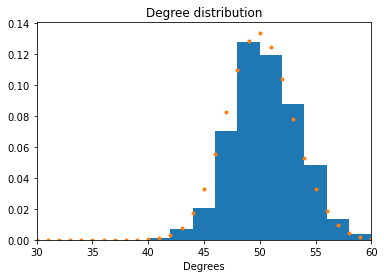

In [27]:
#g1=nx.watts_strogatz_graph(2000, 50, 0.2, seed=None)

all_node_degree1 = list(dict((nx.degree(g1))).values())
#plt.plot(unique_degree, nodes_with_degree)
plt.hist(all_node_degree1, density = True)
plt.plot(degrees_ws,pp,".")
plt.xlabel("Degrees")
plt.ylabel("")
plt.title("Degree distribution")
#plt.show()   
plt.xlim([30,max(degrees_ws)])

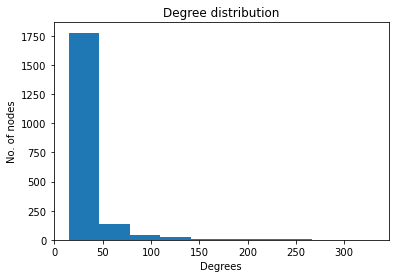

In [28]:
g2= nx.barabasi_albert_graph(2000, 15)
all_node_degree2 = list(dict((nx.degree(g2))).values())
  
unique_degree2 = list(set(all_node_degree2)) #avoid repetition
unique_degree2.sort()
nodes_with_degree2 = []
for i in unique_degree2:
    nodes_with_degree2.append(all_node_degree2.count(i))
#print(unique_degree2) 
#print(all_node_degree2)
#print(nodes_with_degree2)
plt.hist(all_node_degree2)
#plt.plot(unique_degree2, nodes_with_degree2)
plt.xlabel("Degrees")
plt.ylabel("No. of nodes")

plt.title("Degree distribution")

plt.show()



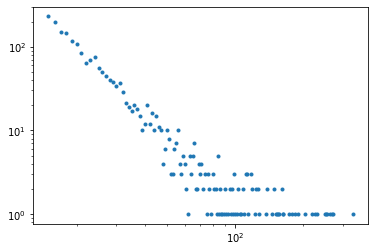

In [33]:
degree_freq_ba = nx.degree_histogram(g2)
deegrees_ba = np.arange(len(degree_freq_ba))

plt.loglog(deegrees_ba[15:],degree_freq_ba[15:],".")